In [285]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [286]:
d, u, i = np.loadtxt('../tools/match_traj.csv', delimiter=',')
i = i/np.max(i)

print(d.shape, u.shape, i.shape)

(27539,) (27539,) (27539,)


In [287]:
t = np.sort(np.unique(i))
x = np.linspace(0, np.max(d), 2000)

t_sig = 0.015
x_sig = 0.02

dt = t[:, None] - i[None, :]
dx = x[:, None] - d[None, :]

pt = stats.norm.pdf(dt, 0, t_sig)
px = stats.norm.pdf(dx, 0, x_sig)

p = pt @ px.T
# p = p/np.sum(p, axis=0)[None, :]

p = p/np.sum(p, axis=1)[:, None]


(300, 2000) (300, 2000) (300, 2000)


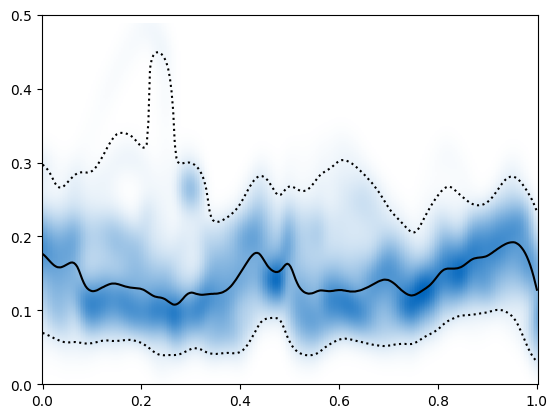

In [288]:
fig, ax = plt.subplots()

x_mesh, t_mesh = np.meshgrid(x, t)

print(x_mesh.shape, t_mesh.shape, p.shape)

cvut_blue = (0/255, 101/255, 189/255)
cvut_orange = (224/255, 82/255, 6/255)

cmap_N = 256
cmap_vals = np.ones((cmap_N, 4))
cmap_vals[:, 0] = np.linspace(1, cvut_blue[0], cmap_N)
cmap_vals[:, 1] = np.linspace(1, cvut_blue[1], cmap_N)
cmap_vals[:, 2] = np.linspace(1, cvut_blue[2], cmap_N)
cmap = ListedColormap(cmap_vals)

ax.pcolormesh(t_mesh, x_mesh, p, cmap=cmap)


p_mode = x[np.argmax(p, axis=1)]

cdf = np.cumsum(p, axis=1)
p_ci_l = x[np.argmax(cdf > 0.025, axis=1)]
p_ci_h = x[np.argmax(cdf > 0.975, axis=1)]

p_med= x[np.argmax(cdf > 0.5, axis=1)]

ax.set_ylim(0, 0.5)

plt.plot(t, p_med, 'k')
plt.plot(t, p_ci_l, 'k:')
plt.plot(t, p_ci_h, 'k:')

plt.show()


In [296]:
d, u, i = np.loadtxt('../tools/match_traj_straight.csv', delimiter=',')
i = i/np.max(i)

print(d.shape, u.shape, i.shape)

(27539,) (27539,) (27539,)


In [297]:
t = np.sort(np.unique(i))
y = np.linspace(0, np.max(u), 2000)

t_sig = 0.01
y_sig = 0.02

dt = t[:, None] - i[None, :]
dy = y[:, None] - u[None, :]

pt = stats.norm.pdf(dt, 0, t_sig)
py = stats.norm.pdf(dy, 0, y_sig)

p = pt @ py.T
# p = p/np.sum(p, axis=0)[None, :]

p = p/np.sum(p, axis=1)[:, None]

(300, 2000) (300, 2000) (300, 2000)


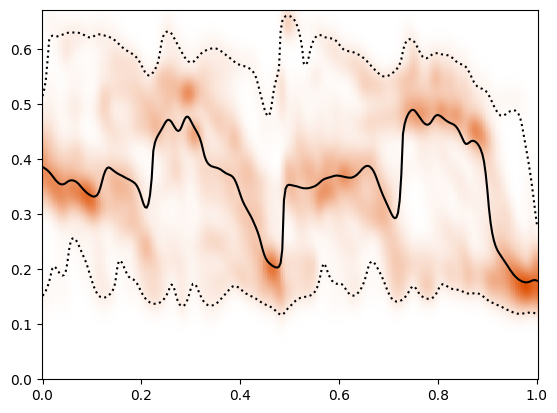

In [301]:
fig, ax = plt.subplots()

y_mesh, t_mesh = np.meshgrid(y, t)

print(x_mesh.shape, t_mesh.shape, p.shape)

cvut_blue = (0/255, 101/255, 189/255)
cvut_orange = (224/255, 82/255, 6/255)

cmap_N = 256
cmap_vals = np.ones((cmap_N, 4))
cmap_vals[:, 0] = np.linspace(1, cvut_orange[0], cmap_N)
cmap_vals[:, 1] = np.linspace(1, cvut_orange[1], cmap_N)
cmap_vals[:, 2] = np.linspace(1, cvut_orange[2], cmap_N)
cmap = ListedColormap(cmap_vals)

ax.pcolormesh(t_mesh, y_mesh, p, cmap=cmap)


p_mode = y[np.argmax(p, axis=1)]

cdf = np.cumsum(p, axis=1)
p_ci_l = y[np.argmax(cdf > 0.025, axis=1)]
p_ci_h = y[np.argmax(cdf > 0.975, axis=1)]

p_med= y[np.argmax(cdf > 0.5, axis=1)]

p_mean = np.sum(y*p, axis=1)



plt.plot(t, p_med, 'k')

plt.plot(t, p_ci_l, 'k:')
plt.plot(t, p_ci_h, 'k:')

plt.show()
